In [84]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [9]:
! ls ../zippedData/

Netflix_movies_and_tv_shows_clustering.csv.zip
bom.movie_gross.csv.gz
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


exploring bom.movie_gross.csv.gz

In [12]:
df_bom = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [13]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [27]:
df_bom.set_index(['year'])

,title,studio,domestic_gross,foreign_gross
year,,,,
2010,Toy Story 3,BV,415000000.0,652000000
2010,Alice in Wonderland (2010),BV,334200000.0,691300000
2010,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
2010,Inception,WB,292600000.0,535700000
2010,Shrek Forever After,P/DW,238700000.0,513900000
...,...,...,...,...
2018,The Quake,Magn.,6200.0,NaN
2018,Edward II (2018 re-release),FM,4800.0,NaN
2018,El Pacto,Sony,2500.0,NaN


exploring rt.movie_info.tsv.gz

In [20]:
df_rt = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
df_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [21]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## exploring tmdb.movies.csv.gz

In [367]:
df_tmdb = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=[0])
df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [30]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
    the page has all meaning for genre_ids codes, will try to change values of data frame, so genre can be desplayed from data frame

In [416]:
list_of_numberStrings = df_tmdb['genre_ids'].tolist()
list_of_numberStrings

['[12, 14, 10751]',
 '[14, 12, 16, 10751]',
 '[12, 28, 878]',
 '[16, 35, 10751]',
 '[28, 878, 12]',
 '[12, 14, 10751]',
 '[28, 12, 14, 878]',
 '[16, 10751, 35]',
 '[16, 10751, 35]',
 '[16, 28, 35, 10751, 878]',
 '[16, 35, 10751]',
 '[10751, 14, 12]',
 '[53, 12, 28]',
 '[16, 10751]',
 '[27, 80]',
 '[12, 14, 18, 10749]',
 '[28, 53, 878]',
 '[10402, 10749]',
 '[28, 18, 53]',
 '[18, 53, 9648]',
 '[28, 18, 9648, 53]',
 '[28, 35]',
 '[12, 10751, 14]',
 '[18, 10749]',
 '[53, 28, 12, 35, 80]',
 '[18, 36]',
 '[28, 35, 80, 53]',
 '[28, 12, 10751, 14]',
 '[28, 878, 12, 53]',
 '[18]',
 '[28, 53]',
 '[18, 36]',
 '[28, 53, 878, 12]',
 '[28, 18, 9648, 53]',
 '[12, 14, 28]',
 '[35, 10749]',
 '[28, 12, 18]',
 '[35, 14, 10751]',
 '[35, 12, 14, 16, 10751]',
 '[35]',
 '[14, 12, 28, 35, 18]',
 '[28, 35, 10749]',
 '[35]',
 '[35, 10749]',
 '[80, 18, 28, 53]',
 '[27]',
 '[28, 53]',
 '[18, 53]',
 '[16, 12, 10751, 14]',
 '[10749, 18]',
 '[12, 28, 18]',
 '[28, 35, 80]',
 '[80, 18, 53]',
 '[28, 37, 18, 14, 53]',


In [417]:
def extractDigits(lst):
    res = []
    for el in lst:
        sub = el.split(', ')
        res.append(sub)
      
    return(res)

In [423]:
casi_list = extractDigits(list_of_numberStrings)
casi = casi_list[1]

delete all '[ ]' symbols

In [424]:
special_char = '[]'

casi_list2 = [''.join(filter(lambda i: i not in special_char, string)) for string in casi]
casi_list2

['14', '12', '16', '10751']

## exploring tn.movie_budgets.csv.gz

In [354]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [355]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


transform objt to int for all numeric columns

removing all commas from numeric data

In [356]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',','')

removing all $ from numeric data

In [357]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$','')

In [358]:
df_tn['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [359]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


doing the same for domestic_gross and worldwide_gross columns

In [360]:
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',','')
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$','')

In [361]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',','')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$','')

converting values from str to int

In [362]:
df_tn['production_budget'] = df_tn['production_budget'].astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(int)

In [363]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [364]:
df_tn['gross_margin']= df_tn['worldwide_gross'] - df_tn['production_budget']


movies with largest gross margin

In [365]:
df_tn.sort_values(by=['gross_margin'], ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799


movies that did poorly 
note: movies relased on stream services dont include any info on domestic or worldwide_gross columns, therefore gross_margin shows a negative result

In [366]:
df_tn.sort_values(by=['gross_margin']).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_margin
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,-90000000
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000
477,78,"Apr 21, 2017",The Promise,90000000,8224288,10551417,-79448583


In [351]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   int64  
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
 6   gross_margin       5234 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 327.1+ KB


change 0 values to NaN, drop NaN values

In [342]:
#df_tn = df_tn.replace(0, np.nan)
#df_tn = df_tn.dropna()

## exploring im.db.zip



In [99]:
! ls ../../../../../../project-exp/data/im.db   


bom.movie_gross.csv     rt.movie_info.tsv       tmdb.movies.csv
bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tmdb.movies.csv.gz
im.db                   rt.reviews.tsv          tn.movie_budgets.csv
im.db.zip               rt.reviews.tsv.gz       tn.movie_budgets.csv.gz


In [100]:
conn = sqlite3.connect('../../../../../../project-exp/data/im.db')

all tables 

In [101]:
pd.read_sql("""

SELECT * 
FROM sqlite_master

""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [211]:
pd.read_sql("""

SELECT * 
FROM movie_ratings

""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [212]:
pd.read_sql("""

SELECT  
        basi.genres,
        COUNT()
        
        

FROM movie_basics AS basi



LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

group by basi.start_year

ORDER BY COUNT() DESC

""", conn)

,genres,COUNT()
0,"Comedy,Drama,Fantasy",17504
1,"Action,Crime,Drama",17272
2,Drama,16849
3,Sci-Fi,16243
4,"Adventure,Comedy,Romance",15589
5,"Action,Crime,Drama",14709
6,"Documentary,History",13787
7,"Animation,Drama,History",12900
8,Drama,11849
9,"Biography,Drama",8379


*Exploring movies that contain 'Drama' among their genres, only considering movies with numvotes above a 1000, went from 30788 values to 5044. got average rating*

In [311]:
Drama_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Drama%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

same, but using Action Genre

In [312]:
Action_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Action%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

same, but using Thriller/horror  Genre

In [313]:
Thriller_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Thriller%' 
        AND basi.genres LIKE '%Horror%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [314]:
Fantasy_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Fantasy%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Fantasy_raitings

5.998060344827586

In [315]:
Sci_Fi_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Sci-Fi%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Sci_Fi_raitings

5.714473684210526

In [316]:

Comedy_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Comedy%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Comedy_raitings

6.112916111850865

In [317]:

Adventure_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Adventure%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Adventure_raitings

6.156686626746507

In [322]:

Documentary_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Documentary%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [319]:
avg_raiting=[Drama_raitings, Action_raitings, Thriller_raitings, Fantasy_raitings, Sci_Fi_raitings, Comedy_raitings, Adventure_raitings, Documentary_raitings]
avg_raiting_name=['Drama', 'Action', 'Thriller', 'Fantasy', 'Sci_Fi', 'Comedy', 'Adventure', 'Documentary']


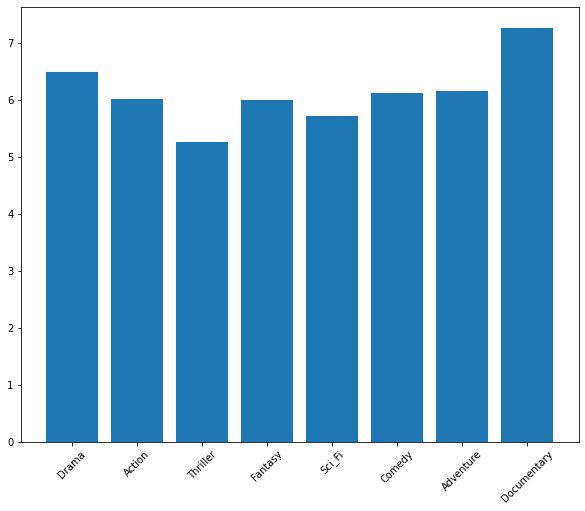

In [320]:
f, ax = plt.subplots(figsize=(10,8))

ax.bar(avg_raiting_name, avg_raiting)

plt.xticks(rotation = 45);